In [2]:
!pip install deeplake
!pip install keras
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install tensorflow
!pip install keras tensorflow-gpu
!pip install tensorflow-gpu


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\PC\AppData\Local\Temp\pip-install-m4od08rh\tensorflow-gpu_18bfd15c8ab64f9480b0bd49534247a8\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build w


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\PC\AppData\Local\Temp\pip-install-igs3zfmj\tensorflow-gpu_2879e5121d594bc9886492080d8a8b66\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build w

# **Importação de dependências que serão usadas durante o código**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
import keras
import tensorflow as tf
import os
from glob import glob

# **Criando dados para o modelo**

In [3]:
data = pd.read_csv('../GS/Data_Entry_2017_v2020.csv')
data = data[data['Patient Age']<100]
data_image_paths = {os.path.basename(x): x for x in glob(os.path.join('..', 'GS', 'images', '*.png'))}
print('Scans found:', len(data_image_paths), ', Total Headers', data.shape[0])
data.sample(5)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
44460,00011441_001.png,Effusion,1,11441,69,M,PA,2992,2991,0.143,0.143
85965,00021201_075.png,Effusion|Infiltration,75,21201,66,M,AP,3056,2544,0.139,0.139
72708,00017920_021.png,No Finding,21,17920,45,M,AP,2500,2048,0.168,0.168
3940,00001075_029.png,Nodule,40,1075,59,F,AP,3056,2544,0.139,0.139
36460,00009609_001.png,No Finding,1,9609,52,M,AP,2500,2048,0.168,0.168


# **Criando uma lista de labels individual**

In [4]:
data['Finding Labels'] = data['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
97638,00025769_015.png,Effusion|Infiltration|Pneumothorax,15,25769,59,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
61238,00015101_000.png,Nodule,0,15101,67,F,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19904,00005311_000.png,,0,5311,46,F,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


15 labels são encontradas - 14 para diagnósticos, uma com resultado sem problema algum

In [5]:
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if data[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(data[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


# **Análise de dados**

Agora que o carregamos os dados, podemos começar com a análise de dados:

Quantidade de pessoas sem doença:  60361 
Quantidade de pessoas com doença:  51759


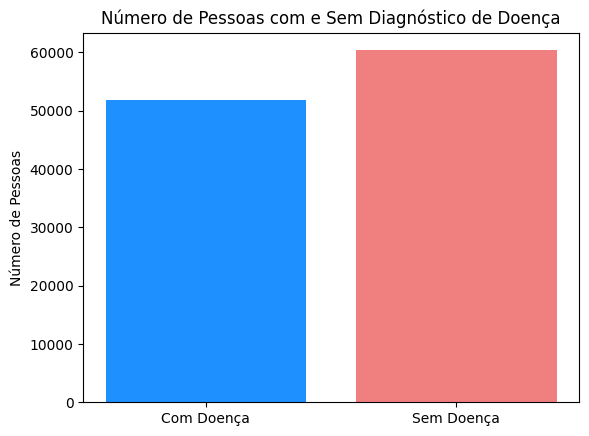

In [37]:
# Contar o número de pessoas com diagnóstico de doença e sem diagnóstico
num_com_doenca = data[data['Finding Labels'] != ''].shape[0]
num_sem_doenca = data[data['Finding Labels'] == ''].shape[0]
print('Quantidade de pessoas sem doença: ',num_sem_doenca,'\nQuantidade de pessoas com doença: ',num_com_doenca)
# Criar um gráfico de barras
plt.bar(['Com Doença', 'Sem Doença'], [num_com_doenca, num_sem_doenca], color=['dodgerblue', 'lightcoral'])
plt.title('Número de Pessoas com e Sem Diagnóstico de Doença')
plt.ylabel('Número de Pessoas')
plt.show()

Podemos notar que grande parte dos diagnósticos dados a pessoas que vão para o hospital examinar os pulmões retornam com resultado negativo. Já que esse número de pessoas sem doença é tão grande, vamos deixar esse dado de lado e visualizar em cima de outras classificações do diagnóstico:

Quantidade de mulheres atendidas diangosticadas:  48780 
Quantidade de homens atendidos diangosticados:  63340


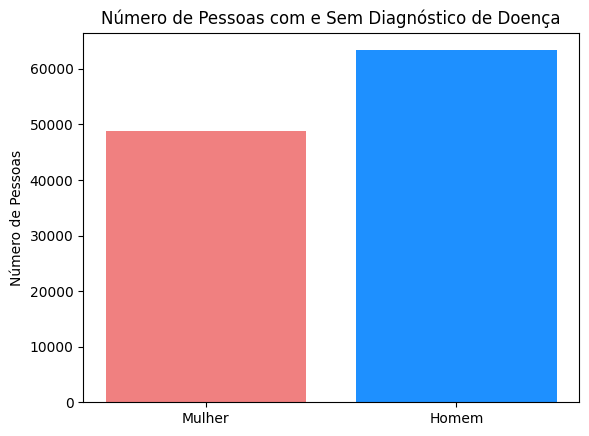

In [105]:
df = data[data['Finding Labels'] != '']
# Contar o número de pessoas com diagnóstico de doença e sem diagnóstico
num_mulheres = data[data['Patient Gender'] == 'F'].shape[0]
num_homens = data[data['Patient Gender'] == 'M'].shape[0]
print('Quantidade de mulheres atendidas diangosticadas: ',num_mulheres,'\nQuantidade de homens atendidos diangosticados: ',num_homens)
# Criar um gráfico de barras
plt.bar(['Mulher', 'Homem'], [num_mulheres, num_homens], color=['lightcoral', 'dodgerblue'])
plt.title('Número de Pessoas com e Sem Diagnóstico de Doença')
plt.ylabel('Número de Pessoas')
plt.show()

**Observação**: Homens dentro dessa pesquisa compõem aproximadamente 57% da quantidade de dados totais, enquanto as mulheres ocupam 43%.

<Figure size 3200x600 with 0 Axes>

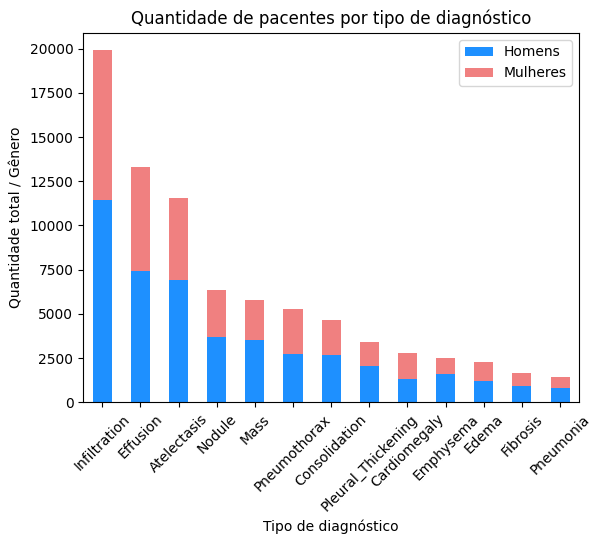

In [103]:
# Calcular a quantidade de pessoas com cada doença por sexo
disease_counts_female = df[df['Patient Gender'] == 'F'][all_labels].sum()
disease_counts_male = df[df['Patient Gender'] == 'M'][all_labels].sum()

dis_gen = pd.DataFrame({'Homens':disease_counts_male, 'Mulheres':disease_counts_female})
dis_gen['Total'] = dis_gen['Homens'] + dis_gen['Mulheres']
dis_gen = dis_gen.sort_values(by = 'Total', ascending = False)

# Criar um gráfico de barras para cada sexo
plt.figure(figsize = (32, 6))
dis_gen[['Homens', 'Mulheres']].plot(kind = 'bar', stacked = True, color = ['dodgerblue', 'lightcoral'])
plt.title('Quantidade de pacentes por tipo de diagnóstico')
plt.xlabel('Tipo de diagnóstico')
plt.ylabel('Quantidade total / Gênero')
plt.xticks(rotation = 45)
plt.show()


Não podemos observar discrepância em relação ao gênero da pessoa com base no seu diagnóstico. Podemos agora fazer a divisão por idades:

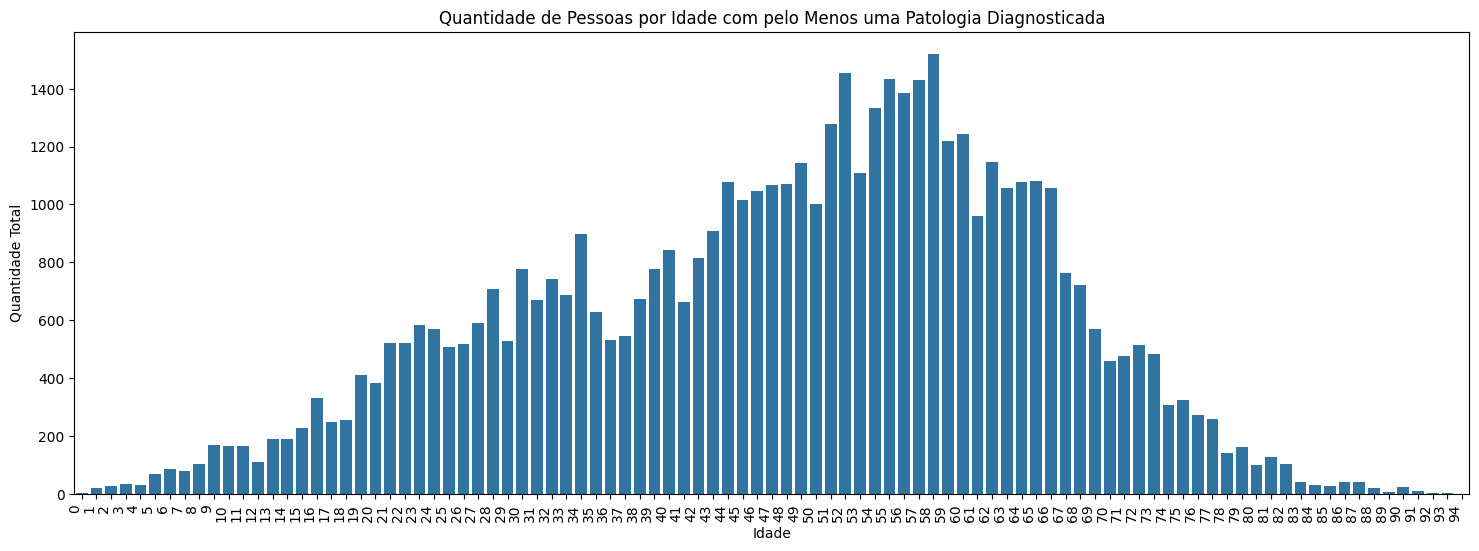

In [106]:
# Criar coluna indicando se tem ou não patologia
df['Tem_Patologia'] = df['Finding Labels'].apply(lambda x: 1 if len(x.split('|')) > 0 else 0)

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(18, 6))
sns.countplot(x='Patient Age', data=df, linewidth=1)

plt.title('Quantidade de Pessoas por Idade com pelo Menos uma Patologia Diagnosticada')
plt.xlabel('Idade')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=90, ha='right')

plt.show()

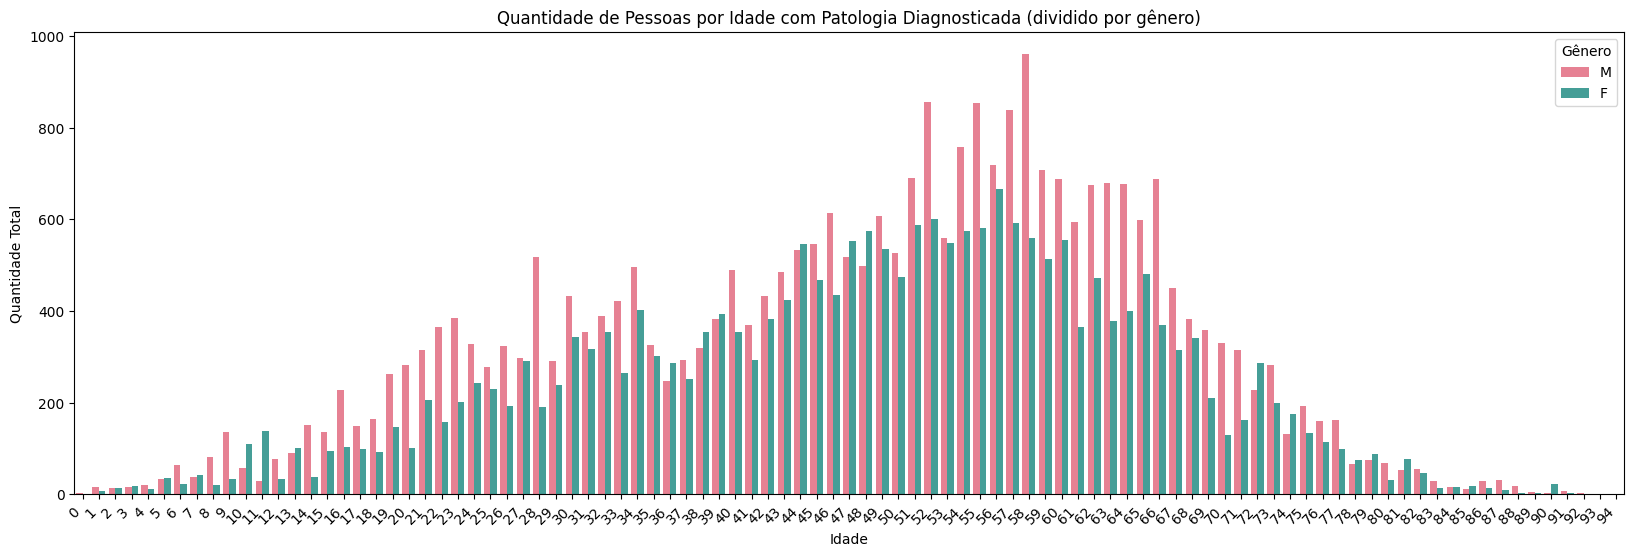

Quantidade de pacientes homens total:  46281.0
Quantidade de pacientes mulheres total:  34668.0


In [97]:
# Criar um gráfico de barras empilhadas para homens e mulheres
plt.figure(figsize=(20, 6))
sns.countplot(x='Patient Age', hue='Patient Gender', data=df, palette='husl', linewidth=3)
plt.title('Quantidade de Pessoas por Idade com Patologia Diagnosticada (dividido por gênero)')
plt.xlabel('Idade')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gênero', loc='upper right')
plt.show()

print('Quantidade de pacientes homens total: ', disease_counts_male.sum())
print('Quantidade de pacientes mulheres total: ', disease_counts_female.sum())

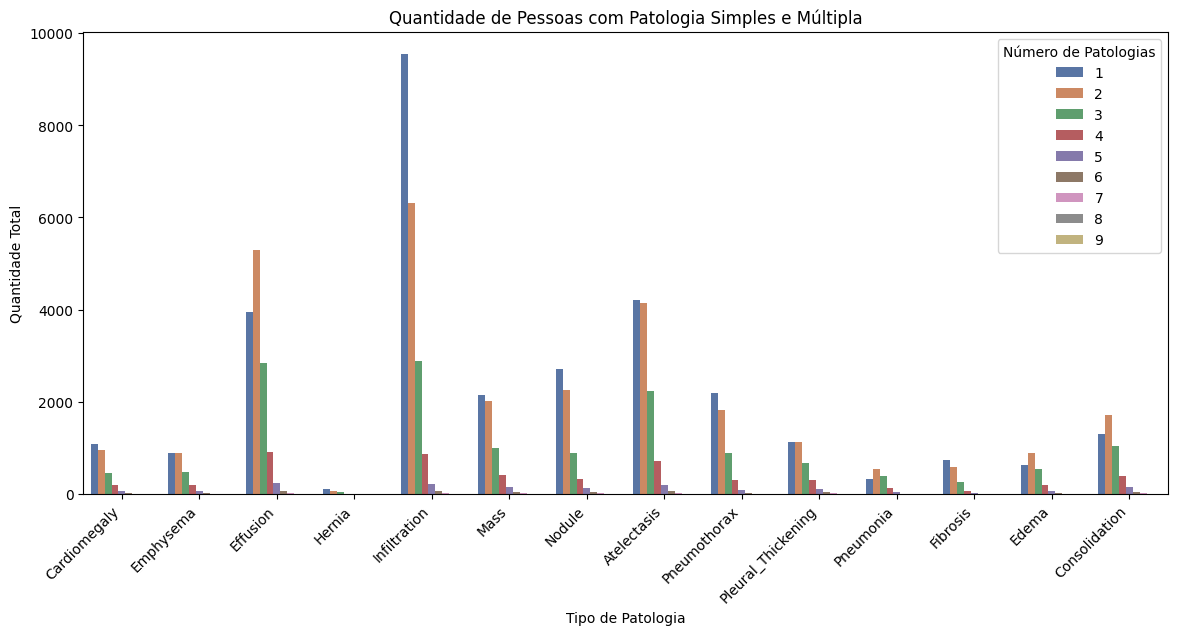

Dos  51759  pacientes diagnosticados, encontramos esses diagnósticos em:
Infiltration: 19894 pessoas
Effusion: 13317 pessoas
Atelectasis: 11559 pessoas
Nodule: 6331 pessoas
Mass: 5782 pessoas
Pneumothorax: 5302 pessoas
Consolidation: 4667 pessoas
Pleural_Thickening: 3385 pessoas
Cardiomegaly: 2776 pessoas
Emphysema: 2516 pessoas
Edema: 2303 pessoas
Fibrosis: 1686 pessoas
Pneumonia: 1431 pessoas
Hernia: 227 pessoas


In [109]:
# Criar coluna indicando o número de patologias
df['Num_Patologias'] = df['Finding Labels'].apply(lambda x: len(x.split('|')))

# Criar coluna indicando a lista de patologias
df['Patologia'] = df['Finding Labels'].apply(lambda x: x.split('|'))

# Explodir a coluna 'Patologia' para criar uma linha para cada patologia
df_exploded = df.explode('Patologia')

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(14, 6))
sns.countplot(x='Patologia', hue='Num_Patologias', data=df_exploded, palette='deep')
plt.title('Quantidade de Pessoas com Patologia Simples e Múltipla')
plt.xlabel('Tipo de Patologia')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Número de Patologias', loc='upper right')
plt.show()

total_pessoas = df.shape[0]
print('Dos ',total_pessoas, ' pacientes diagnosticados, encontramos esses diagnósticos em:')
for label, count in df_exploded['Patologia'].value_counts().items():
    print(f'{label}: {count} pessoas')

Podemos aqui observar algumas coisas: 
- Hernia é o diagnóstico mais raro, estando presente em apenas 227 pessoas (menos de 1% dos pacientes);
- Alguns diagnósticos são acompanhados de outros, como infiltração, efusão, massa, nódulo, atelectasia e pneumotórax;
- Pouca parte dos diagnósticos retornou apenas uma patologia simples. Elas parecem vir acompanhadas de outras, tendo casos onde um diagnóstico (efusão, por exemplo) foi encontrada com muita pouca frequência sozinha;
- Infiltração tem um índice gigantesco de diagnósticos, e é comparativamente muito mais comum em relação a outras patologias de ser encontrado sozinho. Uma teoria que pode ser seguida a partir dessa observação é que infiltração é a causa de outros diagnósticos citados nessa lista.

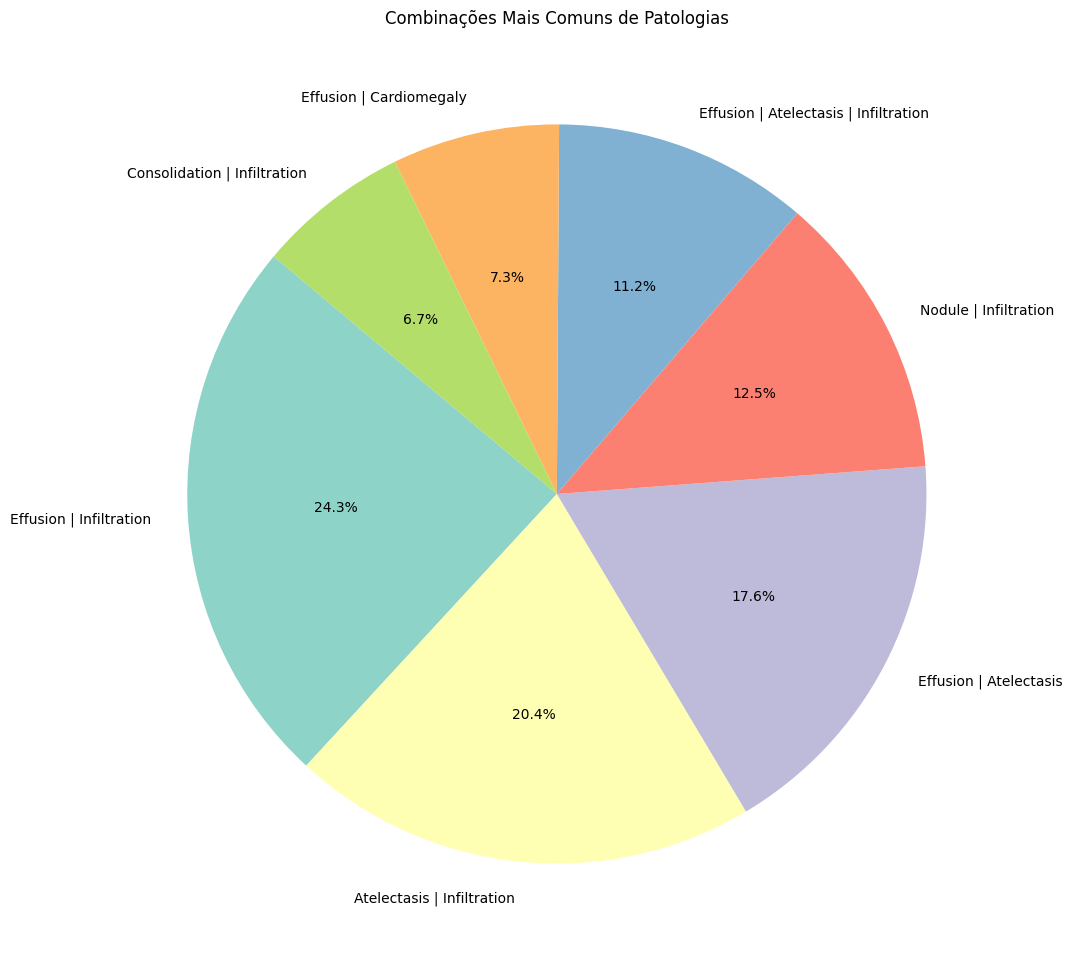

In [125]:
# Filtrar linhas com mais de uma doença
df_multiple_labels = df[df['Finding Labels'].str.contains('\|')]

# Contar a ocorrência de combinações de patologias
combination_counts = df_multiple_labels['Finding Labels'].str.split('|').apply(frozenset).value_counts()

# Escolher as combinações mais comuns
top_combinations = combination_counts.head(7)

# Extrair as patologias presentes em cada combinação
labels = [' | '.join(combination) for combination in top_combinations.index]

# Criar um gráfico de pizza
plt.figure(figsize=(12, 12))
plt.pie(top_combinations, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Combinações Mais Comuns de Patologias')
plt.show()

Podemos observar aqui as combinações mais frequentes de diagnósticos que encontramos dentro dessa pesquisa com os pacientes. Poedmos observar que Efusão e Infiltração são bem prevalentes dentro do diagnóstico, e que as combinações de *Efusão & Infiltração*, *Atelectasia & Infiltração*, *Efusão & Atelectasia* e *Nódulo & Infiltração* compõem a grande maioria dos diagnósticos múltiplos. Infiltração está presente em sua grande maioria.

# **Processo de desenvolvimento da CNN**

# **Criando vetor de doenças**
Esse vetor de doenças irá dividir a classificação de doença com 0 e 1, correspondendo se o tipo de diagnóstico foi encontrado ou não. O array tem 15 espaços, correspondendo a cada tipo de diagnóstico. Uma pessoa pode ter mais de um diagnóstico (cardiomegalia e fibrose, por exemplo).

In [ ]:
data['vetor_doenca'] = data['Finding Labels'].apply(lambda x: [1 if label in x.split('|') else 0 for label in all_labels])
data['vetor_doenca'] = data['vetor_doenca'].apply(np.array)
#data['vetor_doenca'] = data.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [26]:
#data = data[['Image Index', 'Finding Labels', 'vetor_doenca']]
data['path'] = data['Image Index'].map(data_image_paths.get)

# **Realizando a divisão entre treino e teste**

In [27]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, 
                                   test_size = 0.20, 
                                   random_state = 2018,
                                   stratify = data['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'test', test_df.shape[0])


train 89696 test 22424


# **Realizando a divisão entre treino e validação**

In [28]:
train_df, valid_df = train_test_split(train_df, 
                                   test_size = 0.10, 
                                   random_state = 2018,
                                   stratify = train_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'valid', valid_df.shape[0])

train 80726 valid 8970


Agora temos a divisão completa entre treino, teste e validação. 80726 imagens serão usadas no teste de deep learning, 8970 serão usadas como validação dos dados e 22424 imagens serão usadas como teste.

# **Criando a função flow_from_dataframe**

In [29]:
def custom_flow_from_dataframe(img_data_gen, in_df, path_col, y_col, base_dir=None, **dflow_args):
    if base_dir is None:
        base_dir = os.path.dirname(in_df[path_col].values[0])

    # Convertendo os arrays numpy em strings
    in_df[y_col] = in_df[y_col].apply(lambda x: ' '.join(map(str, x)))

    # Removendo a parte do diretório da coluna de caminho
    in_df[path_col] = in_df[path_col].apply(lambda x: os.path.basename(x))

    df_gen = img_data_gen.flow_from_dataframe(dataframe=in_df,
                                             directory=base_dir,
                                             x_col=path_col,
                                             y_col=y_col,
                                             class_mode='sparse',
                                             **dflow_args)
    
    df_gen.directory = ''  # Não use o diretório, pois temos caminhos completos em x_col
    
    file_exists = [os.path.exists(os.path.join(base_dir, filename)) for filename in in_df[path_col].values]
    print("Arquivos existem:", file_exists)
    
    print('Reinserindo o dataframe: {} imagens'.format(in_df.shape[0]))
    return df_gen

# **Carregando importações do ImageDataGenerator**

In [30]:
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
IMG_SIZE = (224, 224)
core_idg_dense = ImageDataGenerator(rescale=1./255,
                                    samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    horizontal_flip = True, 
                                    vertical_flip = False, 
                                    height_shift_range= 0.05, 
                                    width_shift_range=0.1, 
                                    rotation_range=5, 
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    zoom_range=0.15)

# **Carregando as imagens e diagnóstico do conjunto de dados de treino, validação e teste**

In [31]:
train_gen = custom_flow_from_dataframe(core_idg_dense, train_df, 
                                path_col = 'path',
                                y_col = 'vetor_doenca',
                                target_size = IMG_SIZE,
                                color_mode = 'rgb',
                                batch_size = 16)

valid_gen = custom_flow_from_dataframe(core_idg_dense, valid_df, 
                                path_col = 'path',
                                y_col = 'vetor_doenca',
                                target_size = IMG_SIZE,
                                color_mode = 'rgb',
                                batch_size = 32) # we can use much larger batches for evaluation

test_gen = custom_flow_from_dataframe(core_idg_dense, test_df, 
                                path_col = 'path',
                                y_col = 'vetor_doenca', 
                                target_size = IMG_SIZE,
                                color_mode = 'rgb',
                                batch_size = 8000) # one big batch

Found 80726 validated image filenames belonging to 666 classes.
Arquivos existem: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,

In [107]:
print(train_df.head())


            Image Index          Finding Labels  Follow-up #  Patient ID  \
6891   00001836_077.png             Mass|Nodule           77        1836   
69079  00017046_006.png  Emphysema|Pneumothorax            6       17046   
27961  00007286_011.png                                   11        7286   
24717  00006495_002.png                                    2        6495   
2459   00000632_002.png                                    2         632   

       Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
6891            49              F            AP                 2500     2048   
69079           63              M            PA                 2992     2991   
27961           51              M            AP                 2500     2048   
24717           29              F            AP                 2500     2048   
2459            44              M            PA                 2500     2048   

       OriginalImagePixelSpacing[x  ...  Fibrosis  Herni

# **Diferentes tipos de Transfer-Learning**

# **VGG16**

In [125]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten

input_shape = (224, 224, 3)
img_in = Input(shape=input_shape)

# Carrega o modelo VGG16
base_model_vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3), input_tensor = img_in, pooling='avg')

In [126]:
from keras.layers import Dropout, GlobalAveragePooling2D
from keras import regularizers

# Congela os pesos das camadas convolucionais
for layer in base_model_vgg.layers:
    layer.trainable = False
    
# Adiciona uma camada densa para classificação binária
x = base_model_vgg.output
x = Flatten()(base_model_vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid", name="predictions")(x)

In [38]:
# Cria o novo modelo
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions)

In [127]:
optimizer = Adam(learning_rate=0.0001)
# Compila o modelo
model_vgg.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[keras.metrics.binary_accuracy])

In [40]:
model_vgg.fit(train_gen, steps_per_epoch=100, epochs=1, validation_data=valid_gen)

100/100 [==============================] - 675s 7s/step - loss: -207.2395 - binary_accuracy: 0.0550 - val_loss: -251.9167 - val_binary_accuracy: 0.0201


# **Densenet**

In [15]:
train_df.value_counts

<bound method DataFrame.value_counts of             Image Index        Finding Labels                 vetor_doenca  \
96575  00025444_002.png          Infiltration  0 0 0 0 0 0 0 1 0 0 0 0 0 0   
77153  00018960_019.png            No Finding  0 0 0 0 0 0 0 0 0 1 0 0 0 0   
71576  00017635_004.png          Infiltration  0 0 0 0 0 0 0 1 0 0 0 0 0 0   
8560   00002266_000.png            No Finding  0 0 0 0 0 0 0 0 0 1 0 0 0 0   
30629  00008008_008.png  Fibrosis|Mass|Nodule  0 0 0 0 0 0 1 0 1 0 1 0 0 0   
...                 ...                   ...                          ...   
48674  00012342_003.png                  Mass  0 0 0 0 0 0 0 0 1 0 0 0 0 0   
95286  00024998_000.png          Infiltration  0 0 0 0 0 0 0 1 0 0 0 0 0 0   
12099  00003152_002.png            No Finding  0 0 0 0 0 0 0 0 0 1 0 0 0 0   
844    00000210_000.png            No Finding  0 0 0 0 0 0 0 0 0 1 0 0 0 0   
36143  00009543_000.png            No Finding  0 0 0 0 0 0 0 0 0 1 0 0 0 0   

                   path

In [128]:
from keras.layers import Dense, Flatten
from keras.layers import Dropout, GlobalAveragePooling2D
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

input_shape = (224, 224, 3)
img_in = Input(shape=input_shape) # camada de entrada
model = DenseNet121(include_top= False , 
                weights='imagenet',      
                input_shape= input_shape,
                input_tensor=img_in,
                pooling ='avg')

for layer in model.layers:
    layer.trainable = False

x = Flatten()(model.output)
x = BatchNormalization()(model.output)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(len(all_labels), activation="sigmoid", name="predictions")(x)

In [129]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[keras.metrics.binary_accuracy])

In [130]:
model.fit(train_gen, steps_per_epoch=100, validation_data=valid_gen, epochs=1)

100/100 [==============================] - 413s 4s/step - loss: 62.1727 - binary_accuracy: 0.3928 - val_loss: 32.1940 - val_binary_accuracy: 0.3903


# **Checagem de saída**

In [131]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_gen,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

KeyboardInterrupt: 

In [132]:
previsao = model.predict(test_gen, batch_size = 32, verbose = True)

# **ResNet**

In [34]:
from keras.applications import ResNet50

input_shape = (224, 224, 3)
img_in = Input(shape=input_shape)  # camada de entrada

# Use a ResNet50 como base (não incluindo as camadas totalmente conectadas no topo)
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=img_in, input_shape=input_shape, pooling='avg')

# Congele as camadas convolucionais da ResNet50
for layer in base_model_resnet.layers:
    layer.trainable = False

x = Flatten()(base_model_resnet.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid", name="predictions")(x)
base_model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)


In [35]:
optimizer = Adam(learning_rate=0.0001)
base_model_resnet.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[keras.metrics.binary_accuracy])

In [36]:
base_model_resnet.fit(train_gen, steps_per_epoch=100, validation_data=valid_gen, epochs=1)

100/100 [==============================] - 456s 5s/step - loss: -632.6177 - binary_accuracy: 0.0275 - val_loss: -697.0198 - val_binary_accuracy: 0.0201


# **MobileNet**

In [20]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Cria o base_model referente a MobileNet V2, sem a camada de classificação
base_model_mobilenet = MobileNetV2(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

In [32]:
from keras import layers

global_average_layer = layers.GlobalAveragePooling2D()
saida_layer = layers.Dense(1, activation='sigmoid')

In [33]:
model_mobilenet = tf.keras.Sequential([
  base_model_mobilenet,   #### cnn mobilenet
  global_average_layer, ###flatten
  saida_layer ### especiallista
])

In [34]:
optimizer = Adam(learning_rate=0.0001)
model_mobilenet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[keras.metrics.binary_accuracy])

In [35]:
model_mobilenet.fit(train_gen, steps_per_epoch=100, epochs=1, validation_data=valid_gen)



100/100 [==============================] - 268s 3s/step - loss: -942.8956 - binary_accuracy: 0.0875 - val_loss: 1799.4359 - val_binary_accuracy: 0.5365
